# Análise Marketplace

Esse problema de marketplace foi me passado por um amigo, não tenho certeza da origem, provavelmente recebeu em um processo seletivo. Imagino que esse problema não seja mais usado para esse fim, então eu vou divulgá-lo com a minha análise como portifólio.

-----

# **Descrição do problema**


Dentro da empresa existe uma equipe que é responsável por definir as características de produtos
que vão ser construídos. Para uma categoria de liquidificadores, por exemplo, essa equipe fica
responsável por definir a cor, volume do copo, material do copo ou mesmo se vai ter um filtro para
suco de frutas.


Para definir as características das diferentes categorias de produtos, a equipe procura entender
quando o cliente se interessa por um produto. É nesse ponto que o time do Labs é chamado. O seu
objetivo principal é desenvolver um modelo que consiga classificar o produto entre "interessante" e
"não interessante" dados os atributos do mesmo. Além disso, é desejável que você também consiga
indicar quais são os atributos e respectivos valores que mais impulsionam o interesse do cliente.
Mais importante que o resultado final é a sua estratégia de solução. Deixe claro cada passo da sua
solução e explique as decisões tomadas durante o processo. Também é importante que você nos
mande o seu código desenvolvido (Python ou Scala). Uma sugestão é usar Jupyter Notebook.
Assim, você consegue explicar cada ponto da sua estratégia de forma mais explícita.
Esperamos receber de você um documento com a explicação do trabalho desenvolvido.


 **Bom trabalho!**


Conjunto de dados


O conjunto de dados possui os atributos de cada produto de uma categoria de panelas e se houve ou
não interesse do cliente ao visualizar o produto no site. Cada linha é o registro da visualização de
um cliente em determinado momento.

-----

Importando as bibliotecas e o dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('problem1_dataset.csv')

In [3]:
df.sample(10)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
175682,259619742,26.0,NaN,NaN,PRETO,QUADRADO,29.0,FUMIL,NaN,NaN,...,45.0,NaN,SIM,NAO,0.0,FRIGIDEIRA,NAO,872.137837,59.130000,0.0
171206,256745782,23.0,NaN,INOX,AZUL,NaN,20.0,VEC,NaN,NaN,...,21.0,NaN,NAO,NAO,0.0,CHALEIRA,NAO,412.843706,34.990000,0.0
21605,239456874,9.0,1.85,ALUMINIO,VERMELHO,REDONDO,21.0,LA CUISINE,Yes,no,...,38.5,1.0,NAO,NAO,0.0,PANELA,NAO,974.160332,69.990000,1.0
142397,253661510,49.5,6.00,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,765.573294,102.990000,1.0
89594,653412,NaN,2.50,INOX,INOX,NaN,NaN,TRAMONTINA,No,no,...,NaN,NaN,NAO,NAO,0.0,CACAROLA,NAO,524.062833,168.500000,0.0
100227,253661510,49.5,6.00,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,530.602706,109.900000,1.0
90186,227368822,42.7,4.50,ALUMINIO,CEREJA,REDONDO,32.7,TRAMONTINA,Yes,no,...,18.1,12.0,NAO,NAO,0.0,PANELA,SIM,266.180379,95.000000,0.0
159488,216538542,13.0,NaN,ALUMINIO,NaN,NaN,15.0,TRAMONTINA,No,no,...,14.0,NaN,NAO,NAO,0.0,FERVEDOR,NAO,915.628289,60.411765,0.0
86902,254633516,30.5,NaN,ALUMINIO,GOIABA,REDONDO,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,706.635890,180.711545,0.0
105940,260007942,28.0,NaN,NaN,PRETO,REDONDO,37.0,PANELA MINEIRA,NaN,NaN,...,40.0,NaN,SIM,NAO,1.0,PANELA,NAO,522.848858,89.990000,0.0


Reutilização de uma função útil obtina no kaggle

In [4]:
def resume(df):
    """
    Objective: For a given dataframe this function provides information
    regarding Missing and Unique values per column.

    Input: param df: Dataframe to check the information.

    Output: return summary: a dataframe with columns providing summary per column of the input dataframe.
    
    """
    df = df.copy()
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary

In [5]:
resume(df)

Dataset Shape: (180275, 21)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,ITEM_ID,int64,0,0.000000,787
1,ALTURA,float64,9268,0.051410,125
2,CAPACIDADE_(L),float64,103604,0.574700,58
3,COMPOSICAO,object,23297,0.129230,5
4,COR,object,10024,0.055604,24
5,FORMATO,object,90264,0.500702,5
6,LARGURA,float64,9268,0.051410,118
7,MARCA,object,274,0.001520,35
8,PARA_LAVA_LOUCAS,object,76189,0.422627,3
9,PARA_MICRO_ONDAS,object,93873,0.520721,2


In [6]:
df.describe()

,ITEM_ID,ALTURA,CAPACIDADE_(L),LARGURA,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_TAMPA,SESSION_ID,ITEM_PRICE,INTERESTED
count,1.802750e+05,171007.000000,76671.000000,171007.000000,98524.000000,171007.000000,122770.000000,180275.000000,178273.000000,167178.000000,180275.000000
mean,2.156229e+08,30.575636,4.234668,27.882157,311.259118,34.797386,13.870742,0.440704,499.757195,127.831019,0.086130
std,1.030257e+08,14.856403,1.699274,10.494943,1727.585999,15.179911,43.641581,0.496473,288.841689,137.298241,0.280556
min,2.939160e+05,2.000000,0.045000,4.500000,0.619000,2.500000,1.000000,0.000000,1.011194,0.550000,0.000000
25%,2.273688e+08,19.000000,3.100000,20.000000,120.000000,19.800000,3.000000,0.000000,249.343773,74.990000,0.000000
50%,2.485863e+08,30.500000,4.500000,27.800000,160.000000,38.500000,6.000000,0.000000,500.759182,104.482418,0.000000
75%,2.567376e+08,42.700000,6.000000,35.000000,190.000000,47.000000,12.000000,1.000000,749.204738,146.327727,0.000000
max,2.711264e+10,84.000000,11.000000,91.000000,44400.000000,148.000000,300.000000,1.000000,1000.984988,2274.990000,1.000000


Importando bibliotecas de visualização de dados

In [7]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

<AxesSubplot:xlabel='ITEM_ID', ylabel='INTERESTED'>

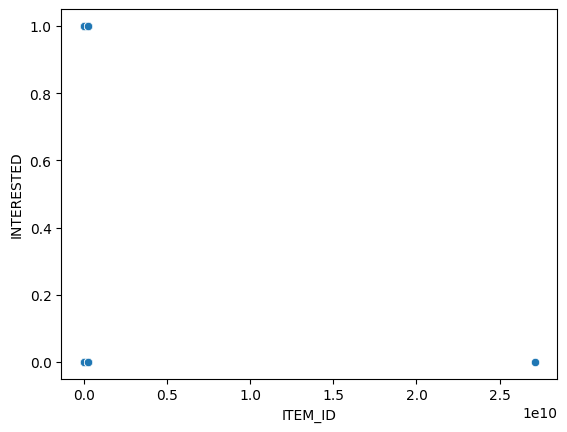

In [8]:
sns.scatterplot(x=df['ITEM_ID'],y=df['INTERESTED'])

/home/djego/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ITEM_ID'>

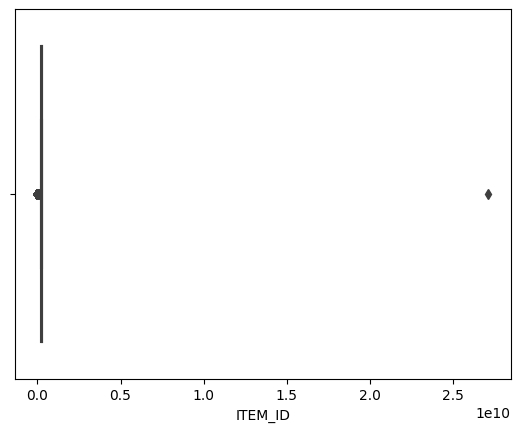

In [9]:
sns.boxplot(df['ITEM_ID'])

In [10]:
df['SESSION_ID'].max()

1000.98498803

In [11]:
df1 = df[df['SESSION_ID']>1000]
df2 = df[df['SESSION_ID']>1000]

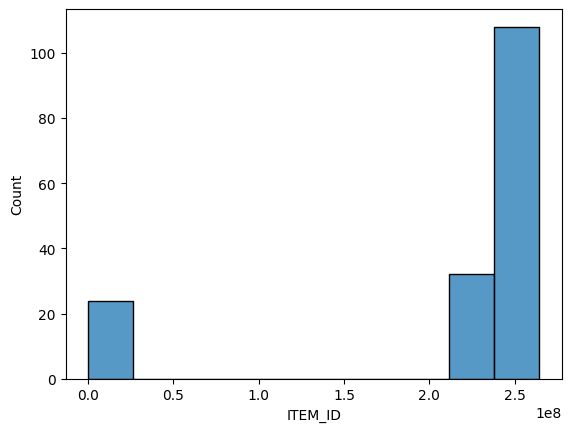

In [12]:
plot = sns.histplot(df1['ITEM_ID'],bins=10)

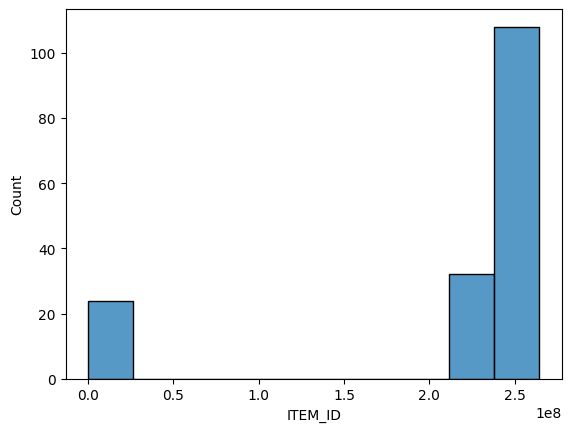

In [13]:
plot2 = sns.histplot(df2['ITEM_ID'],bins=10)

O atributo SESSIO_ID está relacionado com o comportamento de cada usuário no sistema, para esse problema, não estamos interessados em classificar usuários, e esse atributo deve ser removido para evitar vazamento de informação.

/home/djego/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ITEM_ID'>

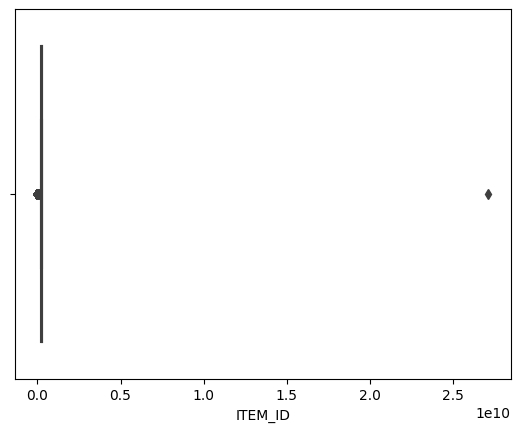

In [14]:
sns.boxplot(df['ITEM_ID'])

O mesmo efeito acontece com o atributo ITEN_ID, estamos focados nas características de um produto que são interessantes e não nos produtos que possuem essas características.

In [15]:
df=df.drop('SESSION_ID',axis=1)
df=df.drop('ITEM_ID',axis=1)

In [16]:
df

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
0,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,199.990000,0.0
1,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,150.0,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,105.112581,0.0
2,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,139.990000,0.0
3,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.293333,1.0
4,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,199.990000,1.0
180271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAO,NAO,0.0,ESPAGUETEIRA,NAO,NaN,0.0
180272,16.0,NaN,INOX,INOX,NaN,18.5,VEC,NaN,NaN,NaN,18.5,6.0,NAO,NAO,0.0,CHALEIRA,NAO,35.052381,0.0
180273,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,105.116593,0.0


<AxesSubplot:xlabel='ALTURA', ylabel='Count'>

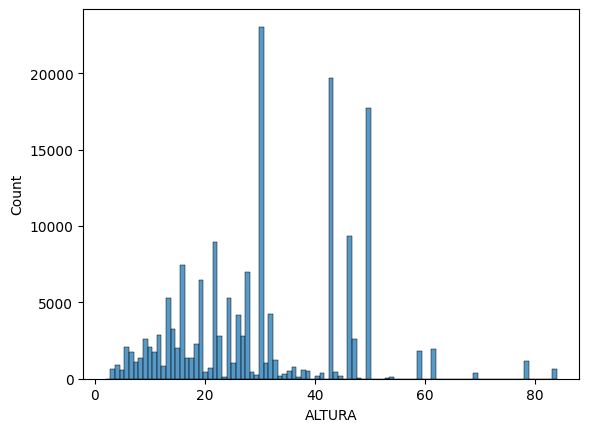

In [17]:
sns.histplot(df['ALTURA'])

<AxesSubplot:xlabel='CAPACIDADE_(L)', ylabel='Count'>

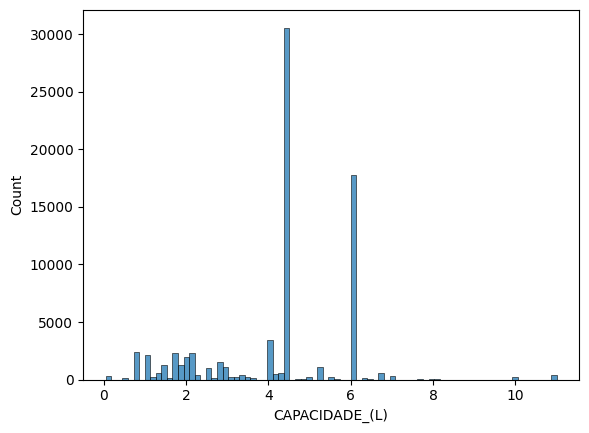

In [18]:
sns.histplot(df['CAPACIDADE_(L)'])

In [19]:
df['COR'].unique()

array(['VINHO', 'COLORIDO', 'INOX', 'VERMELHO', 'AMARELO', 'LARANJA',
       'CEREJA', 'PRETO', 'GRAFITE', nan, 'ROXO', 'TURQUESA', 'PRATA',
       'GOIABA', 'BERINGELA', 'AZUL', 'MARROM', 'VERDE', 'COBRE',
       'CHOCOLATE', 'FENDI', 'BRANCO', 'ROSA', 'ACACIA', 'CINZA'],
      dtype=object)

In [20]:
df['COMPOSICAO'].unique()

array(['ALUMINIO', 'INOX', nan, 'CERAMICA', 'PORCELANA', 'ACO ESMALTADO'],
      dtype=object)

In [21]:
df['MARCA'].unique()

array(['LA CUISINE', 'TRAMONTINA', 'EURO', 'PANELA MINEIRA', 'FUMIL',
       'CERAFLAME', 'EURO HOME', 'VEC', 'BRINOX', 'ALUMINIO FORTALEZA',
       'MTA', 'HAPPYCALL', 'HERCULES', 'SUN GUIDER', 'ROCHEDO',
       'ELECTROLUX', 'PANELUX', 'DONA CHEFA', 'ALUMINIO RAMOS',
       'TRAMONTINA DESIGN COLLECTION', 'MIMO STYLE', 'PRAVA', nan,
       'AT.HOME', 'JOMAFE', 'OXFORD COOKWARE', 'PRAVAS', 'FORMA',
       'BIALETTI', 'BR HOME', 'ZANELLA', 'CLASSIC HOME', 'DYNASTY',
       'MERIDIONAL', 'CONSUL', 'HELIOS'], dtype=object)

In [22]:
df['TIPO_PRODUTO'].unique()

array(['PANELA', 'PIPOQUEIRA', 'ESPAGUETEIRA', 'CREMEIRA', 'WOK',
       'CACAROLA', 'CUSCUZEIRA', 'CHAPA', 'CHALEIRA', 'FRIGIDEIRA',
       'FERVEDOR', 'SANDUICHEIRA', 'FONDUE', 'MINI-CACAROLA',
       'OMELETEIRA', 'PAELLERA', 'BIFETEIRA', 'CALDEIRAO', 'CUMBUCA',
       'PANQUEQUEIRA', 'FRITADEIRA', 'FOGAREIRO', 'FORMA', 'LEITEIRA',
       'GRILL', 'BULE', 'COZI-VAPORE', 'ASSADEIRA', 'TAMPA', 'COZI-PASTA',
       'PRENSADOR', 'CUSCUZEIRO', 'FORNO', 'PAPEIRO', 'BISTEQUEIRA',
       'CANECO', 'VAPORELLA', 'CANECA/FERVEDOR'], dtype=object)

In [33]:
df[df['TIPO_PRODUTO']=='WOK'].TIPO_WOK.value_counts()

AttributeError: 'DataFrame' object has no attribute 'TIPO_WOK'

In [24]:
df[df['TIPO_PRODUTO']!='WOK'].TIPO_WOK.value_counts

<bound method IndexOpsMixin.value_counts of 0         NAO
1         NAO
2         NAO
3         NAO
4         NAO
         ... 
180270    NAO
180271    NAO
180272    NAO
180273    NAO
180274    NAO
Name: TIPO_WOK, Length: 175446, dtype: object>

A panela do tipo wok é uma panela com o fundo redondo como a da imagem abaixo.

![Alt text](wok.jpeg)

O atributo TIPO_WOK está com as informações repetidas na coluna TIPO_PRODUTO e pode ser descartada

In [25]:
df=df.drop('TIPO_WOK',axis=1)
df

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED
0,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,199.990000,0.0
1,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,150.0,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,105.112581,0.0
2,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,139.990000,0.0
3,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,103.293333,1.0
4,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,199.990000,1.0
180271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAO,NAO,0.0,ESPAGUETEIRA,NaN,0.0
180272,16.0,NaN,INOX,INOX,NaN,18.5,VEC,NaN,NaN,NaN,18.5,6.0,NAO,NAO,0.0,CHALEIRA,35.052381,0.0
180273,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,105.116593,0.0
